# Main Runner

In [1]:
import pandas as pd

from objects import *
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
# Get all files in the experiments folder
experiment_names = os.listdir('experiments')
experiments = []
# read in pickle object
for e in experiment_names:
    with open(f"experiments/{e}", 'rb') as f:
        exp = pickle.load(f)
        experiments.append(exp)
exp = experiments[0]

In [3]:
csmpo = RigidDayTrading(exp, verbose = True)

In [4]:
market_sim = MarketSimulator(exp,csmpo)

In [5]:
final_portf = market_sim.run()

Starting Simulation


  0%|          | 0/30 [00:00<?, ?it/s]

Current Portfolio Value at 2014-11-03: 259697.0
	 Optimizing with 31 time steps, 2005 constraints, and 2604 variables...
	 Optimized. Time taken: 38.203566551208496


100%|██████████| 30/30 [00:41<00:00,  1.39s/it]


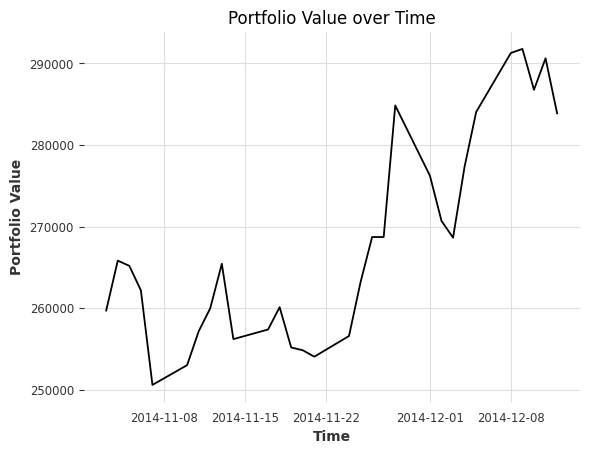

In [6]:
market_sim.plot_value()

Starting Simulation


100%|██████████| 30/30 [02:34<00:00,  5.16s/it]


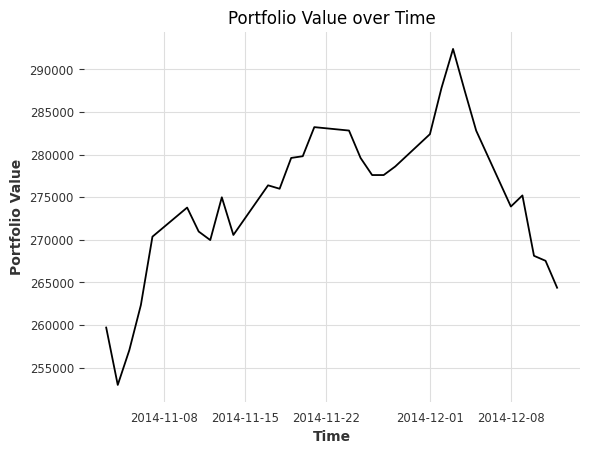

In [7]:
csmpo = DayTradingPolicy(exp, verbose = False)
day_trading_runner = MarketSimulator(exp,csmpo)
day_trading_runner.run()
day_trading_runner.plot_value()

In [8]:
multi_sim = MultiSimRunner(experiments[:3], ["RigidDayTrading", "DayTrading"])
multi_sim.run()

100%|██████████| 3/3 [08:53<00:00, 177.81s/it]


In [9]:
multi_sim.get_results()

,experiment,policy,Gain,Final Value,Initial Value,num_stocks,pct_variance,initial_budget,trading_cost,average_error
0,21_259697_259005_7,RigidDayTrading,1.918808,758005.555000,259697.0,21,0.000145,259697,7,8.593288
1,21_259697_259005_7,DayTrading,0.018009,264373.880000,259697.0,21,0.000145,259697,7,8.593288
2,23_285529_285076_9,RigidDayTrading,1.205591,629760.270000,285529.0,23,0.000139,285529,9,6.977223
3,23_285529_285076_9,DayTrading,0.136957,324634.129997,285529.0,23,0.000139,285529,9,6.977223
4,24_254795_252483_3,RigidDayTrading,2.128435,797109.500000,254795.0,24,0.000183,254795,3,7.984705
5,24_254795_252483_3,DayTrading,0.094995,278999.220000,254795.0,24,0.000183,254795,3,7.984705
